## 1

## a

In [1]:
import numpy as np

In [2]:
def f(x,dtype=np.float64):
    return (np.exp(x)*np.sin(x))
    
            

In [3]:
def fd(x,h,dtype=np.float64):
    return(f(x+h)-f(x))/h

In [4]:
def cd(x,h,dtype=np.float64):
    return (f(x+h/2) - f(x-h/2))/h

In [5]:
def ecd(x,h,dtype=np.float64):
    return ((f(x+h/4)-f(x-h/4))/(h/2))

In [6]:
def extd(x,h,dtype=np.float64):
    return ((4*ecd(x,h)-cd(x,h))/3)

$$\epsilon=\frac{\frac{df(x)}{dx}_{computed}-\frac{df(x)}{dx}_{true}}{\frac{df(x)}{dx}_{true}}$$

where the true value of the first derivative of the given function is: $$\frac{df(x)}{dx}=e^x(cos(x)+sin(x))$$



In [7]:
def tdf(x,dtype=np.float64):#f'
    return(np.exp(x)*(np.cos(x)+np.sin(x)))

In [8]:
def tddf(x,dtype=np.float64):#f''
    return(np.exp(x)*(2*np.cos(x)))


In [9]:
def tdddf(x,dtype=np.float64):#f'''
    return(2*np.exp(x)*(np.cos(x)-np.sin(x)))

In [10]:
def tddddf(x,dtype=np.float64):#f''''
    return(-4*np.exp(x)*(np.sin(x)))

In [11]:
def tdddddf(x,dtype=np.float64):#f'''''
    return(4*np.exp(x)*(np.cos(x)+np.sin(x)))

In [12]:
def errfd(x,h,dtype=np.float64):
    return abs(fd(x,h)-tdf(x))/tdf(x)

In [13]:
def errcd(x,h,dtype=np.float64):
    return abs((cd(x,h)-tdf(x))/tdf(x))

In [14]:
def errextd(x,h,dtype=np.float64):
    return abs((extd(x,h)-tdf(x))/tdf(x))

The optimal theortical stepsize for each method is as follows:
$$h_{fd}=\sqrt{4C|\frac{f(x)}{f''(x)}|}$$
$$h_{cd}=({48C|\frac{f(x)}{f'''(x)}|})^{1/3}$$
$$h_{extd}=(8*16*120*C)|\frac{f(x)}{f^{5}(x)}|)^{1/5}$$

In [15]:
#optimals for 0.1,1,100
C=10**-15
x=[0.1,1,100]
h_fd=np.sqrt(abs(4*C*f(x)/tddf(x)))
h_cd=(abs(48*C*(f(x)/tdddf(x))))**(1/3)
h_extd=abs((8*16*120*C)*(f(x)/tdddddf(x)))**(1/5)
print(h_fd,h_cd,h_extd) 

[1.41657807e-08 5.58105317e-08 3.42699260e-08] [1.38843994e-05 4.06268853e-05 2.07073269e-05] [0.00322739 0.00471831 0.00559088]


In [16]:
#printing all the derivatives and their relative error with the optimal step (0.1,1,100)
for i in x:
    for j in h_fd:
        y=fd(i,j),errfd(i,j)
    print('fd:',y)
for i in x:    
    for k in h_cd:
        h=cd(i,k),errcd(i,k)
    print('cd:',h)
for i in x:
    for l in h_extd:
        u=extd(i,l),errextd(i,l)
    print('extd:',u)    
       

fd: (1.209982693611603, 3.144837641147597e-08)
fd: (3.756049280925918, 1.4331865042629288e-08)
fd: (9.568441976554333e+42, 2.24949119287084e-07)
cd: (1.2099826555949944, 2.92413080176016e-11)
cd: (3.7560492270724635, 5.927496446537265e-12)
cd: (9.568439824515624e+42, 3.902436936349778e-11)
extd: (1.2099826555602353, 5.143801233390481e-13)
extd: (3.756049227096568, 4.900760515996522e-13)
extd: (9.56843982415986e+42, 1.843369452482218e-12)


## b

Text(0, 0.5, '$|log_{10}\\epsilon|$')

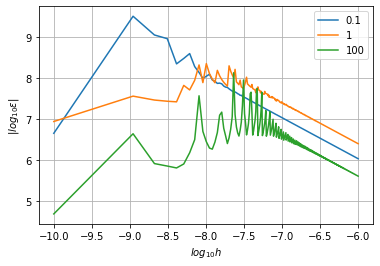

In [17]:
from pylab import plot,xlabel,ylabel,grid,legend
h=np.linspace(1*10**(-10),1*10**(-6),num=1000)
x=(np.log10(h))
y=abs(np.log10(errfd(0.1,h)))
z=abs(np.log10(errfd(1,h)))
w=abs(np.log10(errfd(100,h)))
plot(x,y,label="0.1")
plot(x,z,label="1")
plot(x,w,label="100")

grid()
legend()
xlabel('$log_{10}h$')
ylabel('$|log_{10}\epsilon|$')

Text(0, 0.5, '$|log_{10}\\epsilon|$')

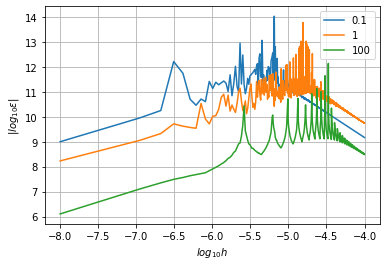

In [18]:
h=np.linspace(1*10**(-8),1*10**(-4),num=1000)
x=(np.log10(h))
z=abs(np.log10(errcd(0.1,h)))
y=abs(np.log10(errcd(1,h)))
w=abs(np.log10(errcd(100,h)))
plot(x,z,label="0.1")
plot(x,y,label="1")
plot(x,w,label="100")
grid()
legend()
xlabel('$log_{10}h$')
ylabel('$|log_{10}\epsilon|$')

Text(0, 0.5, '$|log_{10}\\epsilon|$')

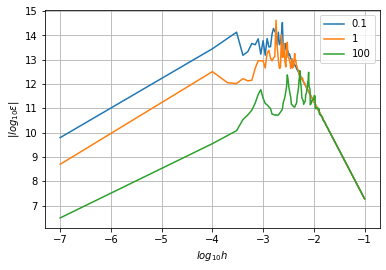

In [19]:
h=np.linspace(1*10**(-7),1*10**(-1),num=1000)
x=(np.log10(h))
z=abs(np.log10(errextd(0.1,h)))
y=abs(np.log10(errextd(1,h)))
w=abs(np.log10(errextd(100,h)))
plot(x,z,label="0.1")
plot(x,y,label="1")
plot(x,w,label="100")
grid()
legend()
xlabel('$log_{10}h$')
ylabel('$|log_{10}\epsilon|$')

The domain for the error functions was set around the optimal step found earlier. It seems that the lowest relative error, i.e that is the peaks on the graphs correspond to the optimal step size. I the case of forward difference, the peak is at about $10^{-8}$; central difference, $10^{-5}$ and extended difference, $10^{-2}$. The round of error dominates when the step size is decreased that is to the left. Furthermore, the approximation error dominates when the step size is too large, hence to the right. It is also evident that the order of accucracy is: $fd<cd<extd$

## C

In [20]:
def ddf1(x,h):
    return(( ((f(x+h)-f(x))/h)-((f(x)-f(x-h))/h) )/h)

In [21]:
def ddf2(x,h):
    return (f(x+h)-2*f(x)+f(x-h))/(h**2)

In [22]:
def errddf1(x,h):
    return abs((ddf1(x,h)-tddf(x))/tddf(x))

In [23]:
def errddf2(x,h):
    return abs((ddf2(x,h)-tddf(x))/tddf(x))

In [24]:
#optimal h for the second derivative is given by:
x=[0.1,1,100]
C=10**-15
h_cdd=(abs(48*C*(f(x)/tddddf(x))))**(1/4)
print(h_cdd)

[0.00033098 0.00033098 0.00033098]


Text(0, 0.5, '$|log_{10}\\epsilon|$')

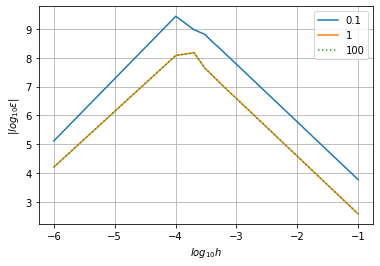

In [25]:
h=np.linspace(1*10**(-6),1*10**(-1),num=1000)
x=(np.log10(h))
z=abs(np.log10(errddf1(0.1,h)))
y=abs(np.log10(errddf1(1,h)))
w=abs(np.log10(errddf1(100,h)))
plot(x,z,label="0.1")
plot(x,y,label="1")
plot(x,y,label="100",linestyle=":")
grid()
legend()
xlabel('$log_{10}h$')
ylabel('$|log_{10}\epsilon|$')

Text(0, 0.5, '$|log_{10}\\epsilon|$')

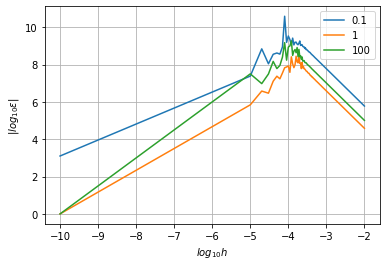

In [26]:
h=np.linspace(1*10**(-10),1*10**(-2),num=1000)
x=(np.log10(h))
z=abs(np.log10(errddf2(0.1,h)))
y=abs(np.log10(errddf2(1,h)))
w=abs(np.log10(errddf2(100,h)))
plot(x,z,label="0.1")
plot(x,y,label="1")
plot(x,w,label="100")

grid()
legend()
xlabel('$log_{10}h$')
ylabel('$|log_{10}\epsilon|$')

It can be seen that that the relative error peak in the second algorithm is of the order $10^{-10}$ and the first one, $10^{-9}$. This difference exists because in the first algorithm $f(x)$ is calculated twice,which adds an extra step. In the second one however, two very similar large numbers subtract form each other, thus, the errors are different.

## 2

In [27]:
import cmath as c

In [28]:
def cf(z):
    return(c.e**(2*z))
    

In [29]:
def cauchyd(N,m):
    sum=0.0
    
    for k in range(0,N):
        sum+=(cf(c.e**(2j*c.pi*k/N))*c.e**(-2j*k*c.pi*m/N))
        
    return sum*(np.math.factorial(m)/N)
    

## 3

## A

$\lambda_i=\prod_{j \neq i} \frac{x-x_j}{x_i-x_j}$ $g(x)=\sum g(x_i)\lambda_i(x)$

In [30]:
E=[0,25,50,75,100,125,150,175,200]
fE=[10.6,16,45,83.5,52.8,19.9,10.8,8.25,4.7] 

In [31]:
def fint(x):
    p=[]
    for i in E:
        prod=1.0
        
        for j in E:
            if i!=j:
                prod*=(x-j)/(i-j)
        p.append(prod)
    
            
    
    
    a=0.0
    for i in range(0,9):
        
        for j in range(0,9):
            
            if i==j:
                a+=(fE[j]*p[i])
                
            
    return (a)    

   

## B

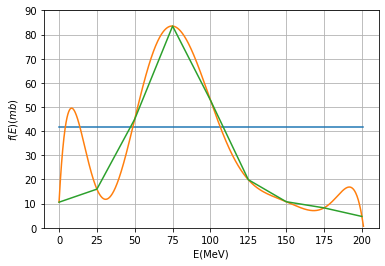

In [32]:
from pylab import ylim


x=np.linspace(0,201,num=1000)

y=fint(x)
z=(83.5/2)+x*0
plot(x,z)
plot(x,y)
plot(E,fE)
xlabel('E(MeV)')
ylabel('$f(E)(mb)$')
ylim(0,90)
grid()


The max is at 75. $\Gamma$ is 107-48.5=58.5. Not quite accurate.

## C,D

In [33]:
def fint1(x):
    p=[]
    for i in E[0:3]:
        prod=1.0
        
        for j in E[0:3]:
            if i!=j:
                prod*=(x-j)/(i-j)
        p.append(prod)
    
            
    
    
    a=0.0
    for i in range(0,3):
        
        for j in range(0,3):
            
            if i==j:
                a+=(fE[j]*p[i])
                
            
    return (a)   

In [34]:
def fint2(x):
    p=[]
    a=0.0
    for i in E[2:5]:
        #print(i)
        prod=1.0
        
        for j in E[2:5]:
            if i!=j:
                #print(j)
                prod*=(x-j)/(i-j)
        p.append(prod)
        #print(p)      
    for i in range(2,5):
        for j in range(0,3):
            if j+2==i:
                #print(a)
                a+=(fE[i]*p[j])
    
    
            
    return (a) 

In [35]:
def fint3(x):
    p=[]
    a=0.0
    for i in E[4:7]:
        #print(i)
        prod=1.0
        
        for j in E[4:7]:
            if i!=j:
                #print(j)
                prod*=(x-j)/(i-j)
        p.append(prod)
        #print(p)      
    for i in range(4,7):
        for j in range(0,3):
            if j+4==i:
                #print(a)
                a+=(fE[i]*p[j])
    
    
            
    return (a) 

In [36]:
def fint4(x):
    p=[]
    a=0.0
    for i in E[6:9]:
        #print(i)
        prod=1.0
        
        for j in E[6:9]:
            if i!=j:
                #print(j)
                prod*=(x-j)/(i-j)
        p.append(prod)
        #print(p)      
    for i in range(6,9):
        for j in range(0,3):
            if j+6==i:
                #print(a)
                a+=(fE[i]*p[j])
    
    
            
    return (a) 

In [37]:
def script(x):
    if x<=50:
        return(fint1(x))
    if x>=50 and x<=100:
        return(fint2(x))
    if x>=100 and x<=150:
        return(fint3(x))
    if x>=150:
        return(fint4(x))

In [38]:
k=[]
for i in np.arange(0,201,0.1):
    k.append(script(i))

Text(0, 0.5, 'f(E)')

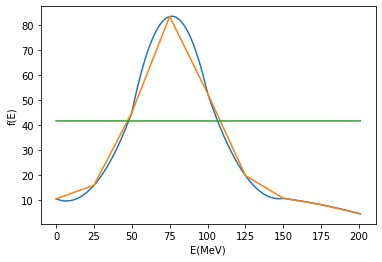

In [39]:
x=np.arange(0,201,0.1)
z=(script(78)/2)+x*0
plot(x,k)
plot(E,fE)
plot(x,z)

xlabel('E(MeV)')
ylabel('f(E)')

It approximates better than global interpolation.


In [40]:
script(78),script(78)/2

(83.46976000000001, 41.734880000000004)

Hence, it does match the theory prediction better. $\Gamma \sim 56$  